# Họ và tên: Bùi Quốc Thịnh
# Mã số sinh viên: 20520934

## Load librtary

In [1]:
import geopandas
import time
import os
import folium
import matplotlib.pyplot as plt
import rtree
import pygeos
import osmnet
import geojson
import json
import pandas as pd
import numpy as np
import sklearn
from geopandas.tools import sjoin
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from folium import plugins
from webdriver_manager.chrome import ChromeDriverManager
from selenium import webdriver

## Load ranh giới quận huyện và dân số quận huyện

In [2]:
gdf = geopandas.read_file("D:\Python programming for machine learning\GIS\CSL_HCMC\Data\GIS\Population\population_HCMC\population_shapefile\Population_District_Level.shp")
gdf = gdf.to_crs(epsg=4326)
gdf

,Dist_Name,Dist_ID,Level,Pop_2009,Pop_2010,Pop_2011,Pop_2012,Pop_2013,Pop_2014,Pop_2015,...,Den_2012,Den_2013,Den_2014,Den_2015,Den_2016,Den_2017,Den_2019,Shape_Leng,Shape_Area,geometry
0,District 1,760,District,180225.0,187435.0,187419.0,190943.0,197421.0,200297.0,193632.0,...,24749.600,25589.300,25962.100,25098.200,27022.100,27377.900,18486.8000,15274.835115,7.714899e+06,"POLYGON ((106.69160 10.79553, 106.69181 10.795..."
1,District 3,770,District,190553.0,188945.0,190631.0,191580.0,193206.0,193694.0,196333.0,...,38897.100,39227.200,39326.300,39862.100,40221.700,40422.900,38652.5000,12182.058264,4.925215e+06,"POLYGON ((106.68641 10.79229, 106.68667 10.792..."
2,District 4,773,District,180980.0,183261.0,184711.0,185649.0,185808.0,187157.0,186727.0,...,44428.400,44466.500,44789.300,44686.400,44750.600,44008.400,41958.7000,9483.716891,4.178668e+06,"POLYGON ((106.71584 10.75245, 106.71574 10.752..."
3,District 6,775,District,249329.0,253474.0,254212.0,257865.0,266121.0,257183.0,258945.0,...,36105.700,37261.600,36010.200,36256.900,36508.500,36790.600,32702.7000,13077.365262,7.140945e+06,"POLYGON ((106.64179 10.73826, 106.63760 10.735..."
4,District 7,778,District,244276.0,274828.0,268483.0,266633.0,280743.0,296757.0,310178.0,...,7563.590,7963.850,8418.120,8798.840,9006.200,9282.350,10216.5000,33260.915360,3.525220e+07,"POLYGON ((106.75137 10.76062, 106.75001 10.758..."
5,District 10,771,District,230345.0,232450.0,236336.0,237086.0,239180.0,238755.0,238558.0,...,41535.600,41902.500,41828.000,41793.500,42015.600,42278.600,41138.5000,10478.512538,5.707881e+06,"POLYGON ((106.66909 10.75992, 106.66888 10.759..."
6,District 11,772,District,226854.0,232536.0,236443.0,233499.0,227860.0,228030.0,230596.0,...,45502.900,44404.000,44437.100,44937.200,45657.200,46206.600,40897.6000,10833.546511,5.131351e+06,"POLYGON ((106.65855 10.76900, 106.65885 10.767..."
7,Phu Nhuan,768,District,174535.0,175175.0,177242.0,179917.0,180456.0,182821.0,182477.0,...,36793.300,36903.500,37387.100,37316.800,37174.300,37482.600,33530.3000,12392.134315,4.889837e+06,"POLYGON ((106.67277 10.81412, 106.67361 10.813..."
8,Tan Binh,766,District,421724.0,430436.0,434298.0,440351.0,443061.0,448989.0,455029.0,...,19627.100,19747.900,20012.100,20281.400,20927.500,20979.800,21162.2000,23807.894025,2.243513e+07,"POLYGON ((106.64909 10.83662, 106.65187 10.836..."
9,Binh Thanh,765,District,457362.0,470054.0,484135.0,484423.0,482833.0,485772.0,487985.0,...,23307.600,23231.100,23372.500,23478.900,23559.400,23605.600,24016.8000,29544.712130,2.078389e+07,"POLYGON ((106.69197 10.80032, 106.69198 10.800..."


## Load dữ liệu click của người dùng

In [3]:
gj = geopandas.read_file("D:\Python programming for machine learning\GIS\click_data.json")
gj

,dbh,geometry
0,1,POINT (106.71136 10.85113)
1,1,POINT (106.71695 10.74449)
2,1,POINT (106.66315 10.83289)
3,1,POINT (106.66267 10.83339)
4,1,POINT (106.65977 10.83729)
...,...,...
83670,1,POINT (106.65664 10.84339)
83671,1,POINT (106.75180 10.85276)
83672,1,POINT (106.73189 10.73154)
83673,1,POINT (106.67640 10.82388)


## Lọc ra 5 quận huyện có tốc độ tăng MẬT ĐỘ dân số nhanh nhất (Dùng dữ liệu 2019  và 2017)

In [4]:
gdf['max_grow'] = gdf['Den_2019'] / gdf['Den_2017']
maxgrow_distname = gdf.sort_values('max_grow', ascending=False).head(5)[['Dist_Name', 'Dist_ID', 'geometry']]
maxgrow_distname

,Dist_Name,Dist_ID,geometry
16,District 9,763,"POLYGON ((106.84015 10.89893, 106.84048 10.897..."
23,Hoc Mon,784,"POLYGON ((106.58361 10.92869, 106.58391 10.928..."
18,Nha Be,786,"POLYGON ((106.72315 10.72162, 106.72428 10.721..."
22,District 12,761,"POLYGON ((106.69433 10.89842, 106.69446 10.897..."
17,District 2,769,"POLYGON ((106.74241 10.80855, 106.74442 10.808..."


## Dùng spatial join (from geopandas.tools import sjoin) để lọc ra các điểm click của người dùng trong 5 quận/huyện hot nhất

In [5]:
joined_table = sjoin(gj, maxgrow_distname)
joined_table

,dbh,geometry,index_right,Dist_Name,Dist_ID
126,1,POINT (106.57481 10.90807),23,Hoc Mon,784
525,1,POINT (106.57148 10.87880),23,Hoc Mon,784
7264,1,POINT (106.65113 10.89893),23,Hoc Mon,784
7964,1,POINT (106.60845 10.83907),23,Hoc Mon,784
12190,1,POINT (106.61414 10.86641),23,Hoc Mon,784
...,...,...,...,...,...
80506,1,POINT (106.72819 10.78848),17,District 2,769
80913,1,POINT (106.75390 10.79923),17,District 2,769
80925,1,POINT (106.75892 10.79026),17,District 2,769
82068,1,POINT (106.74674 10.77871),17,District 2,769


<AxesSubplot:>

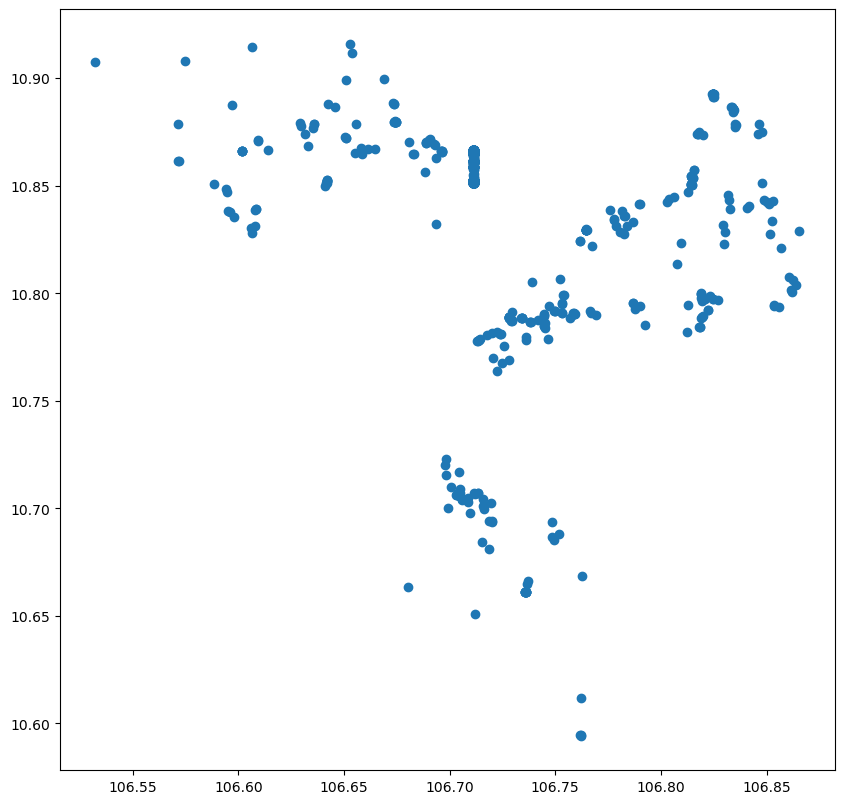

In [6]:
joined_table.plot(figsize=(10, 10))

In [7]:
# joined_table.set_index( ['Dist_Name', 'Dist_ID'], inplace = True)
joined_table['lon'] = joined_table.geometry.x
joined_table['lat'] = joined_table.geometry.y
joined_table['lon']

126      106.574807
525      106.571480
7264     106.651135
7964     106.608447
12190    106.614136
            ...    
80506    106.728187
80913    106.753897
80925    106.758923
82068    106.746741
83394    106.728231
Name: lon, Length: 900, dtype: float64

In [8]:
joined_table

,dbh,geometry,index_right,Dist_Name,Dist_ID,lon,lat
126,1,POINT (106.57481 10.90807),23,Hoc Mon,784,106.574807,10.908071
525,1,POINT (106.57148 10.87880),23,Hoc Mon,784,106.571480,10.878796
7264,1,POINT (106.65113 10.89893),23,Hoc Mon,784,106.651135,10.898929
7964,1,POINT (106.60845 10.83907),23,Hoc Mon,784,106.608447,10.839066
12190,1,POINT (106.61414 10.86641),23,Hoc Mon,784,106.614136,10.866412
...,...,...,...,...,...,...,...
80506,1,POINT (106.72819 10.78848),17,District 2,769,106.728187,10.788476
80913,1,POINT (106.75390 10.79923),17,District 2,769,106.753897,10.799228
80925,1,POINT (106.75892 10.79026),17,District 2,769,106.758923,10.790263
82068,1,POINT (106.74674 10.77871),17,District 2,769,106.746741,10.778713


## Chạy KMean cho top 5 quận huyện này. Lấy K = 20 và lưu 01 cụm điểm nhiều nhất trong các quận huyện ở Bước 5.

In [9]:
list_centroids=[]
for dist in joined_table.Dist_Name.unique():
    joined_table_2 = joined_table[joined_table['Dist_Name']==dist]
    model = KMeans(n_clusters=20, random_state=0)
    model.fit_predict(joined_table_2[['lon', 'lat']])
    joined_table_2['label'] = model.labels_
    max_label = joined_table_2.groupby('label').count().idxmax()[0]
    points = joined_table_2[joined_table_2['label']==max_label]['geometry'].tolist()
    list_centroids+=points
list_centroids

C:\Users\ASUS\anaconda3\envs\CS116\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\anaconda3\envs\CS116\lib\site-packages\geopandas\geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)
C:\Users\ASUS\anaconda3\envs\CS116\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS

## Show lên bản đồ các cụm đông nhất theo từng quận huyện theo dạng HEATMAP

In [10]:
m = folium.Map(location=[10.8231, 106.6297], zoom_start=11, tiles='CartoDB positron')
    
heat_data = [[point.xy[1][0], point.xy[0][0]] for point in list_centroids]

heat_data
plugins.HeatMap(heat_data).add_to(m)
m

## Lưu heatmap xuống file png

In [11]:
delay=5
fn=r'HEATMAP_CLICKDATA.html'
tmpurl='file://{path}/{mapfile}'.format(path=os.getcwd(),mapfile=fn)
m.save(fn)

browser = webdriver.Chrome(ChromeDriverManager().install())
browser.get(tmpurl)
#Give the map tiles some time to load
time.sleep(delay)
browser.save_screenshot(r'HEATMAP_CLICKDATA.png')
browser.quit()

[WDM] - Downloading: 100%|████████████████████████████████████████████████████████| 6.68M/6.68M [00:01<00:00, 6.64MB/s]
C:\Users\ASUS\AppData\Local\Temp\ipykernel_9372\3710926369.py:6: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  browser = webdriver.Chrome(ChromeDriverManager().install())


NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=106.0.5249.103)
Stacktrace:
Backtrace:
	Ordinal0 [0x00B7DF13+2219795]
	Ordinal0 [0x00B12841+1779777]
	Ordinal0 [0x00A2423D+803389]
	Ordinal0 [0x00A0C70A+706314]
	Ordinal0 [0x00A71502+1119490]
	Ordinal0 [0x00A7E8FA+1173754]
	Ordinal0 [0x00A6E616+1107478]
	Ordinal0 [0x00A47F89+950153]
	Ordinal0 [0x00A48F56+954198]
	GetHandleVerifier [0x00E72CB2+3040210]
	GetHandleVerifier [0x00E62BB4+2974420]
	GetHandleVerifier [0x00C16A0A+565546]
	GetHandleVerifier [0x00C15680+560544]
	Ordinal0 [0x00B19A5C+1808988]
	Ordinal0 [0x00B1E3A8+1827752]
	Ordinal0 [0x00B1E495+1827989]
	Ordinal0 [0x00B280A4+1867940]
	BaseThreadInitThunk [0x75EB7BA9+25]
	RtlInitializeExceptionChain [0x77A6BB3B+107]
	RtlClearBits [0x77A6BABF+191]
